In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def show(data):
    plt.imshow(data, cmap="gray")
    plt.show()

# Test Data
Numpy array with zeroes and one distinct pattern

data shape: (1, 10, 10, 1)


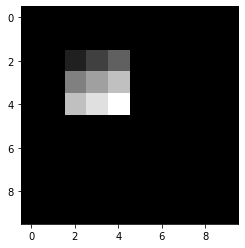

In [54]:
data = np.zeros((10, 10))

data[2:5, 2:5] = [[1, 2, 3], [4, 5, 6], [6, 7, 8]]
data = data.reshape(1, 10, 10, 1)

print(f"data shape: {data.shape}")
show(data[0])

In [55]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# MAX POOLING
## Max pooling 2x2, padding valid

data_1 shape: (1, 9, 9, 1)


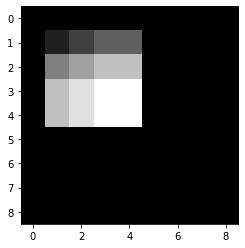

In [56]:
max_pool = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid", autocast=False)
data_1 = max_pool(data)

print(f"data_1 shape: {data_1.shape}")
show(data_1[0])

data_2 shape: (1, 9, 9, 1)


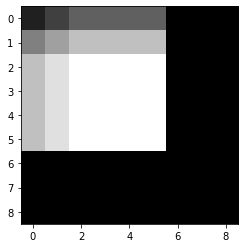

In [60]:
max_pool = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid", autocast=False)
data_2 = max_pool(data_1)

print(f"data_2 shape: {data_2.shape}")
show(data_2[0])

## Max pooling 3x3, padding valid

data_1 shape: (1, 8, 8, 1)


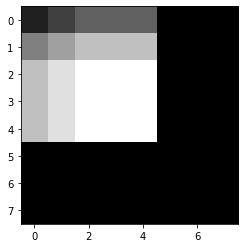

In [61]:
max_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="valid", autocast=False)
data_1 = max_pool(data)

print(f"data_1 shape: {data_1.shape}")
show(data_1[0])

data_1 shape: (1, 6, 6, 1)


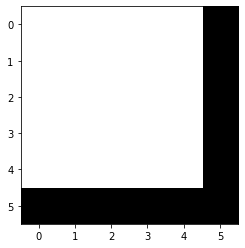

In [62]:
max_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="valid", autocast=False)
data_2 = max_pool(data_1)

print(f"data_1 shape: {data_2.shape}")
show(data_2[0])

### Max pooling 3x3, padding same

data_1 shape: (1, 10, 10, 1)


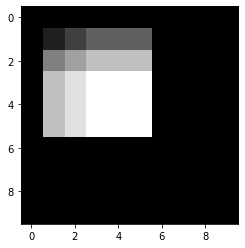

In [59]:
max_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="same", autocast=False)
data_1 = max_pool(data)

print(f"data_1 shape: {data_1.shape}")
show(data_1[0])

data_1 shape: (1, 8, 8, 1)


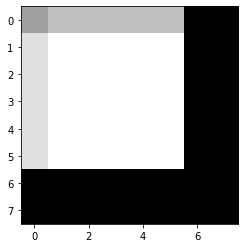

In [63]:
max_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="same", autocast=False)
data_2 = max_pool(data_1)

print(f"data_1 shape: {data_2.shape}")
show(data_2[0])